Model Performance Metrics:
Out-of-Bag Score: 1.0000
Train R-squared: 1.0000
Test R-squared: 0.9963
Train MSE: 962.71
Test MSE: 981841.37


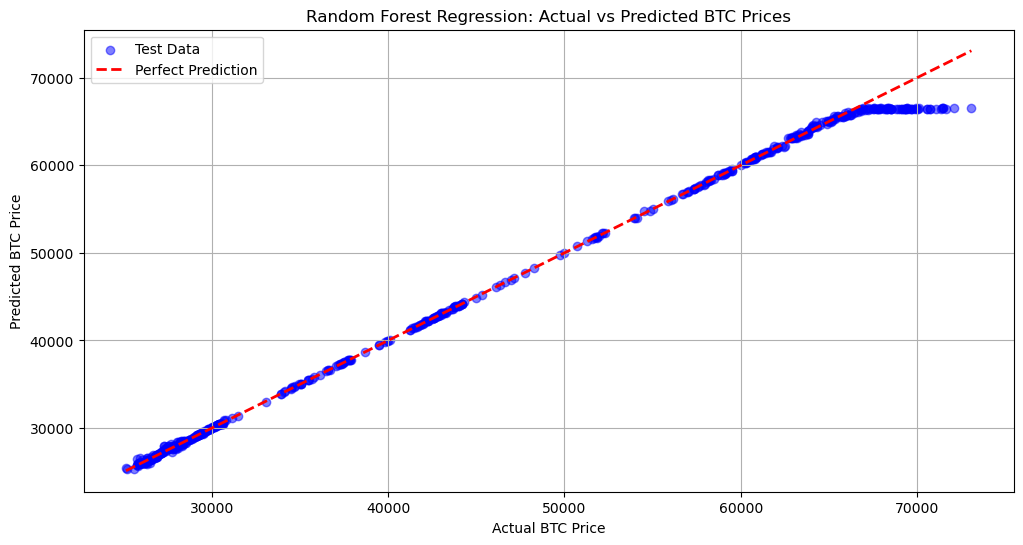

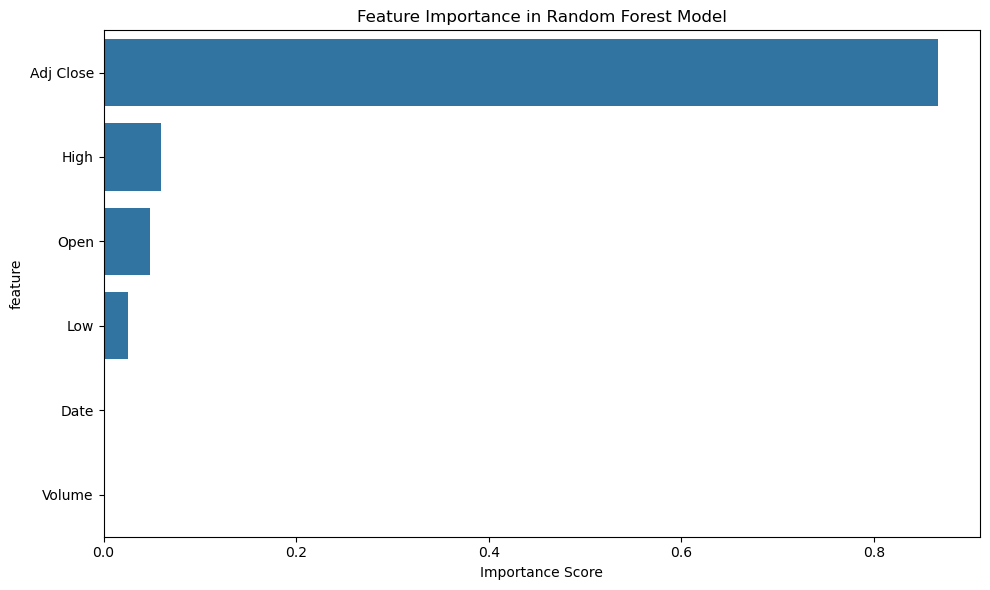

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('BTC.csv')

# Create features and target
# Assuming we're predicting the closing price using other features
X = df.drop(['Close'], axis=1) if 'Close' in df.columns else df.iloc[:, 1:2]
y = df['Close'] if 'Close' in df.columns else df.iloc[:, 2]

# Handle categorical variables
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
X_processed = pd.concat([x_numerical, x_categorical], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, shuffle=False
)

# Initialize and train the model
regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    oob_score=True,
    max_depth=10
)
regressor.fit(X_train, y_train)

# Make predictions
train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

# Evaluate the model
print("Model Performance Metrics:")
print(f'Out-of-Bag Score: {regressor.oob_score_:.4f}')
print(f'Train R-squared: {r2_score(y_train, train_predictions):.4f}')
print(f'Test R-squared: {r2_score(y_test, test_predictions):.4f}')
print(f'Train MSE: {mean_squared_error(y_train, train_predictions):.2f}')
print(f'Test MSE: {mean_squared_error(y_test, test_predictions):.2f}')

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, test_predictions, color='blue', alpha=0.5, label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual BTC Price')
plt.ylabel('Predicted BTC Price')
plt.title('Random Forest Regression: Actual vs Predicted BTC Prices')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': regressor.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()